<a href="https://colab.research.google.com/github/Lin8823/Lin/blob/main/%E7%B6%93%E6%BF%9F%E6%97%A5%E5%A0%B1%E7%88%AC%E8%9F%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests
import json
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import re
import numpy as np
from PIL import Image

In [ ]:
url = "https://money.udn.com/search/result/1001/缺水%20缺電/"
title_arr = []
href_arr = []
content = []
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko)"
               "Chrome/63.0.3239.132 Safari/537.36"}
for pg_nu in range(1,10):
    url = "https://money.udn.com/search/result/1001/缺水%20缺電/"+str(pg_nu)
    response = requests.get(url, headers=headers)
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    page = soup.find_all(name='dt')
    for i in page[73:93]:
        news_title = i.find(name='h3')
        if news_title:
            title_arr.append(news_title)
            link = i.find(name='a')
            href = link.get('href')
            href_arr.append(href)
            print("news_title:",news_title.text)
            print("href:",href)
for i in href_arr:
    response = requests.get(i,headers=headers)
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    page = soup.find(id='article_body')
    p = page.select('p')
    for i in p:
        if type(i.string)!=type(None):
            content.append(i.string.strip())
            print('content:',i.string)

news_title: 領漲大盤股 投資新亮點
href: https://money.udn.com/money/story/12972/5513755
news_title: 季節性必漲題材 夏天飆股點兵出列、多頭走勢強強滾
href: https://money.udn.com/money/story/12972/5513404
news_title: 核二除役威力比李克強更大？今夏限電減產  恐讓台灣鋼鐵漲更兇
href: https://money.udn.com/money/story/5612/5510231
news_title: 工具機廠「五缺」 停接短單
href: https://money.udn.com/money/story/5612/5507562
news_title: 紓困4.0 朱立倫：與民眾期待有落差
href: https://money.udn.com/money/story/7307/5507314
news_title: 年輕人防疫鬆懈？江啟臣：沒有人該在這場疫情中被獵巫
href: https://money.udn.com/money/story/7307/5506895
news_title: 威剛5月營收達36.33元 改寫歷史同期新高
href: https://money.udn.com/money/story/5612/5506878
news_title: 威剛5月營收36.33億元 創歷史同期新高
href: https://money.udn.com/money/story/5612/5506345
news_title: 【達人談投資】半導體大行情來了！這四檔應材概念股跟著起飛
href: https://money.udn.com/money/story/121853/5505326
news_title: 柯建銘：立院臨時會處理紓困4.0預算 盼18日前三讀
href: https://money.udn.com/money/story/7307/5504132
news_title: 【台股擂台】「籌碼大師」李忠興：操作不必只鍾情於航運、鋼鐵
href: https://money.udn.com/money/story/12972/5501648
news_title: 憂缺料缺電及疫情升溫

In [ ]:
import csv
#將爬回新聞存為txt檔
with open('content.txt', 'w', newline="") as file:
    writer = csv.writer(file)
    writer.writerow(content)

# **CKIP中研院斷詞👍**

In [ ]:
pip install ckiptagger

In [ ]:
from ckiptagger import data_utils

In [ ]:
data_utils.download_data_gdown("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:12, 154MB/s]


In [ ]:
from ckiptagger import WS, POS, NER

text = '傅達仁今將執行安樂死，卻突然爆出自己20年前遭緯來體育台封殺，他不懂自己哪裡得罪到電視台。'
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [ ]:
ws_results = ws([text])
pos_results = pos(ws_results)
ner_results = ner(ws_results, pos_results)

print(ws_results)
print(pos_results)
for name in ner_results[0]:
    print(name)

[['傅達仁', '今', '將', '執行', '安樂死', '，', '卻', '突然', '爆出', '自己', '20', '年', '前', '遭', '緯來', '體育台', '封殺', '，', '他', '不', '懂', '自己', '哪裡', '得罪到', '電視台', '。']]
[['Nb', 'Nd', 'D', 'VC', 'Na', 'COMMACATEGORY', 'D', 'D', 'VJ', 'Nh', 'Neu', 'Nf', 'Ng', 'P', 'Nb', 'Na', 'VC', 'COMMACATEGORY', 'Nh', 'D', 'VK', 'Nh', 'Ncd', 'VJ', 'Nc', 'PERIODCATEGORY']]
(23, 28, 'ORG', '緯來體育台')
(0, 3, 'PERSON', '傅達仁')
(18, 22, 'DATE', '20年前')


In [ ]:
word_sentence_list = ws(content)
word_sentence_list

[[],
 ['台股',
  '自',
  '5月',
  '17日',
  '盤中',
  '觸底',
  '反彈',
  '以來',
  '，',
  '已',
  '大漲',
  '超過',
  '11%',
  '，',
  '以',
  '運輸股',
  '、',
  '鋼鐵股',
  '及',
  '部分',
  '電子次',
  '族群',
  '表現',
  '強勁',
  '，',
  '股價',
  '漲幅',
  '領先',
  '超過',
  '大盤',
  '表現',
  '。',
  '這些',
  '「',
  '領漲',
  '大盤股',
  '」',
  '在',
  '各',
  '項',
  '基本面',
  '利多',
  '題材',
  '發酵',
  '下',
  '，',
  '成為',
  '盤面',
  '交投',
  '亮點',
  '。'],
 [],
 ['近期',
  '資本',
  '市場',
  '多空',
  '交戰',
  '，',
  '加權',
  '指數',
  '震盪',
  '劇烈',
  '；',
  '隨著',
  '國際',
  '行情',
  '高檔',
  '整理',
  '，',
  '市場',
  '多空',
  '觀點',
  '也',
  '轉趨',
  '分歧',
  '，',
  '操作',
  '難度',
  '大增',
  '。',
  '專家',
  '建議',
  '，',
  '投資人',
  '可',
  '跟隨',
  '市場',
  '操作',
  '、',
  '布局',
  '「',
  '領漲',
  '大盤股',
  '」',
  '，',
  '做為',
  '選股',
  '參考',
  '依據',
  '，',
  '股價',
  '可望',
  '相對',
  '有',
  '表現',
  '契機',
  '。'],
 ['時序',
  '邁入',
  '夏天',
  '，',
  '近期',
  '氣溫',
  '攀升',
  '，',
  '「',
  '夏月',
  '電價',
  '」',
  '也',
  '自',
  '6月',
  '1日',
  '起',
  '調漲',
  '，',
  '對應到',
  '台股',
  

In [ ]:
word_list = []
file_name = '停用詞.txt'
with open(file_name,'r', encoding = 'utf-8') as f:
    stop_words = f.readlines()
stop_words = [stop_word.rstrip() for stop_word in stop_words]
with open('word.txt', 'w') as f:
  for j in range(len(word_sentence_list)):
      for i in word_sentence_list[j]:
          if i not in stop_words:
              word_list.append(i)
              f.write(i+'\n') 
print(word_list)

['台股', '自', '5月', '17日', '盤中', '觸底', '反彈', '以來', '已', '大漲', '超過', '11%', '運輸股', '鋼鐵股', '部分', '電子次', '族群', '表現', '強勁', '股價', '漲幅', '領先', '超過', '大盤', '表現', '這些', '領漲', '大盤股', '各', '項', '基本面', '利多', '題材', '發酵', '下', '成為', '盤面', '交投', '亮點', '近期', '資本', '市場', '多空', '交戰', '加權', '指數', '震盪', '劇烈', '隨著', '國際', '行情', '高檔', '整理', '市場', '多空', '觀點', '轉趨', '分歧', '操作', '難度', '大增', '專家', '建議', '投資人', '跟隨', '市場', '操作', '布局', '領漲', '大盤股', '做為', '選股', '參考', '依據', '股價', '可望', '相對', '表現', '契機', '時序', '邁入', '夏天', '近期', '氣溫', '攀升', '夏月', '電價', '自', '6月', '1日', '起', '調漲', '對應到', '台股', '市場', '近期', '走勢', '同步', '火熱', '投資人', '應', '如何', '選股', '台股', '逾', '1,700多', '檔', '個股', '中', '哪些', '具備', '多頭', '走勢', '利基', '呢', '事實', '夏天', '選股', '訣竅', '包括', '水', '資源', '太陽能', '節能', '以及', '冷氣機', '家電', '冰品', '飲料', '通路', '等', '仲夏', '概念股', '族群', '短線', '因', '具備', '季節性', '題材', '股價', '多頭', '走勢', '有望', '展開', '最近', '李克強', '努力', '打', '鋼價', '可能', '徒勞無功', '國際', '鋼價', '依然', '節節', '高漲', '然而', '台灣', '鋼鐵業', '最', '擔心', '卻', '李克強', '而是', '核二1號', '

# NLTK詞頻計算


In [ ]:
import nltk
wordfrequency = nltk.FreqDist(word_list)
wordfrequency

FreqDist({'台股': 97,
          '自': 18,
          '5月': 92,
          '17日': 13,
          '盤中': 20,
          '觸底': 1,
          '反彈': 28,
          '以來': 38,
          '已': 160,
          '大漲': 14,
          '超過': 50,
          '11%': 1,
          '運輸股': 1,
          '鋼鐵股': 2,
          '部分': 52,
          '電子次': 1,
          '族群': 25,
          '表現': 46,
          '強勁': 18,
          '股價': 30,
          '漲幅': 28,
          '領先': 15,
          '大盤': 12,
          '這些': 39,
          '領漲': 4,
          '大盤股': 2,
          '各': 72,
          '項': 31,
          '基本面': 14,
          '利多': 11,
          '題材': 4,
          '發酵': 5,
          '下': 123,
          '成為': 54,
          '盤面': 13,
          '交投': 3,
          '亮點': 1,
          '近期': 37,
          '資本': 21,
          '市場': 116,
          '多空': 3,
          '交戰': 2,
          '加權': 8,
          '指數': 93,
          '震盪': 21,
          '劇烈': 5,
          '隨著': 25,
          '國際': 86,
          '行情': 13,
          '高檔': 9,
          '

In [ ]:
df = pd.DataFrame(list(wordfrequency.items()),columns=['字詞','頻率'])
df_sort = df.sort_values(['頻率'],ascending=False)
df_sort.head(50)

,字詞,頻率
128,台灣,727
426,缺,673
454,疫情,312
99,水,304
109,等,300
392,年,282
430,產業,269
153,大,258
463,都,257
214,電,255


In [ ]:
# import csv
# with open('word.txt', 'w', newline='\n') as file:
#     writer = csv.writer(file)
#     writer.writerow(word_list)

# **TF-IDF**

# Jieba 結巴分詞👎

In [ ]:
!pip install jieba

In [ ]:
jieba.enable_paddle()
for str in content:
  seg_list = jieba.cut(str,use_paddle=True)
  new_list.append(list(seg_list))
print(new_list)

Paddle enabled successfully......


[['台', '股', '自', '5月17日', '盤中觸底反彈以來，', '已', '大', '漲', '超過', '11%', '，', '以', '運輸股、鋼鐵股', '及', '部分', '電子', '次族群表現強勁，股價漲幅領', '先', '超過', '大盤表現。這些「領漲大盤股', '」', '在', '各', '項', '基本面', '利多', '題材', '發酵', '下', '，', '成為', '盤面', '交投', '亮點', '。'], ['近期', '資本市場', '多空交戰，', '加', '權指數震盪劇烈；隨', '著', '國際', '行情', '高檔', '整理', '，市場多空觀點也轉趨分歧，操作難度大增。專家建議，投資人可跟隨市場操作、布局「領漲大盤股」，做為選股參考依據，股價', '可望', '相對', '有', '表現', '契機。'], ['時序', '邁', '入', '夏天', '，', '近期', '氣溫', '攀升', '，「夏月電價」', '也', '自', '6月1日起', '調漲，對應', '到', '台股市場，', '近期', '走勢', '也', '同步', '火熱，', '投資', '人', '應', '要', '如何', '選股', '？台', '股', '逾', '1', ',', '700多檔', '的', '個股', '中', '，', '哪些', '具備多頭', '走勢', '的', '利基', '呢', '？'], [], ['事實', '上', '，', '夏天', '選股', '有', '訣竅，', '包括', '水資源、太陽能、節能，', '以及', '冷氣機家電、冰品與飲料通路等「仲夏概念股」族群，短線因具備季節性題材，股價多頭走勢', '有望', '展', '開。'], [], ['最近', '李克強', '努力', '打', '鋼價可能徒勞無功，國際鋼價', '依然', '節節', '高漲', '。', '然而', '讓台灣鋼鐵業', '最', '擔心', '卻', '不是', '李克', '強，', '而是', '核二1號機', '提前', '除役', '，本來', '就', '捉襟見肘', '的', '電力', '更', '吃', '緊，電爐煉鋼', '本月起', '減產

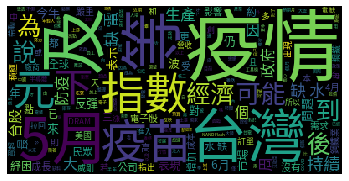

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font = 'SourceHanSansTW-Regular.otf'
new_list = " ".join(new_list)
cloud = WordCloud(font_path=font).generate(new_list)
plt.imshow(cloud)
plt.axis('off')
plt.show()